In [42]:
# 여러개의 특성(독립변수=컬럼=항복=변수 모두 같은 의미)을 사용헌 선형회귀
# 특성이 많을 수록 복잡도 높아짐
# y = a * 특성1 + b * 특성2 + ...+ 절편

In [43]:
# 03_농어의 길이 높이 두께 데이터 파일 읽어 들이기 : 데이터프레임으로
# 변수명 : df

# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

file_name = "./data/03_농어의_길이_높이_두께_데이터.csv"
df = pd.read_csv(file_name)
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [45]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [46]:
# 데이터프레임을 2차원 배열로 변환 /독립변수
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [47]:
# 종속변수 : 농어무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


In [48]:
# 훈련데이터와 테스트데이터 분리 / 7:3

from sklearn.model_selection import train_test_split

# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,
                                                                      test_size=0.3,random_state=42)

print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(39, 3) (39,)
(17, 3) (17,)


In [49]:
# 특성 만들기 : 특성공학이라 칭한다
# <특성 생성 패키지 및 라이브러리, 함수>
# 사용되는 패키지 : sklearn.preprocessing
# 사용되는 클래스 : PolynomialFeatures
# 사용되는 함수 : fit(), transform(), fit_transform()
# 사용되는 데이터 : train_input, test_input (target 그대로 유지)

In [50]:
# 특성만들기 예제
from sklearn.preprocessing import PolynomialFeatures

# 객체 생성
poly = PolynomialFeatures()
# 임의 데이터 사용
temp_data = [[2,3]]
# 특성 조합을 스스로 학습하여 찾기
poly.fit(temp_data)
# 스스로 찾은 특성조합으로 변환
poly.transform(temp_data)

# <특성 조합 패턴>
# 최소 값 : 선형방정식의 y절편값을 가장 처음에 추가
#         : 기본값 1 사용 (선형방정식 y절편의 기본값은 1)
# 두번째 ~ 세번째 값 : 자기 자신 그대로 적용(2,3)
# 네번째 값 : 각 특성을 제곱한 항목을 추가(2^2)
# 다섯번째 값 : 특성끼리 곱한 값(2*3)
# 여섯번째 값 : 각 특성을 제곱한 값(3^2)

array([[1., 2., 3., 4., 6., 9.]])

In [51]:
# 특성 만들기 예제 (절편 제외 시키기)
poly = PolynomialFeatures(include_bias=False)
# 특성조합찾기
poly.fit([[55,12.49,7.6]])
# 특성조합으로 변환
poly.transform([[55,12.49,7.6]])

array([[  55.    ,   12.49  ,    7.6   , 3025.    ,  686.95  ,  418.    ,
         156.0001,   94.924 ,   57.76  ]])

In [52]:
# 훈련데이터 및 테스트데이터의 input 데이터 특성 조합해 생성

# 특성을 추가한다는 의미 : 차원(degree)을 기준으로 생성하게됨
# 기본적으로 사용되는 차원은 2차원(2의 제곱승)을 사용
# 하이퍼파라미터 변수 : degree = 2 (디폴트 생략가능)

# 객체생성
poly = PolynomialFeatures(include_bias=False)
# 훈련시켜 조합 찾아내기
poly.fit(train_input)
# 훈련데이터를 특성 조합으로 변환하여 생성
train_poly = poly.transform(train_input)
# 테스트데이터 변환(동일한 훈련 조합을 사용)
test_poly = poly.transform(test_input)
print(train_poly.shape,train_target.shape)
print(test_poly.shape,test_target.shape)

(39, 9) (39,)
(17, 9) (17,)


In [53]:
# 특성 9개 만들어진 계산 값 확인
print(poly.get_feature_names_out())
#print(poly.get_feature_names())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [54]:
# degree=2로 다중회귀 훈련하기

# 훈련모델 생성
# 훈련 시키기
# 훈련모델과 테스트 모델 검증하여 과적합 확인
from sklearn.linear_model import LinearRegression

# 훈련 모델 생성
lr = LinearRegression()
# 훈련
lr.fit(train_poly,train_target)
# 다중회귀모델 과적합 여부 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9898271546307026
0.9713771600629739


In [55]:
# degree = 5로 훈련

# 객체생성
poly = PolynomialFeatures(include_bias=False,degree=5)
# 훈련시켜 조합 찾아내기
poly.fit(train_input)
# 훈련데이터를 특성 조합으로 변환하여 생성
train_poly = poly.transform(train_input)
# 테스트데이터 변환(동일한 훈련 조합을 사용)
test_poly = poly.transform(test_input)
#print(train_poly.shape,train_target.shape)
#print(test_poly.shape,test_target.shape)

# 훈련 모델 생성
lr = LinearRegression()
# 훈련
lr.fit(train_poly,train_target)
# 다중회귀모델 과적합 여부 확인
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

# 해석
# 과대적합 발생
# 훈련모델은 매우 좋은 성능을 보이고 있지만 
# 테스트 결과 좋지 않다
# 과대적합 해소방법
# 과대적합이 일어나지 않도록 제어하는 개념을 적용 : 규제
# 규제의 개념을 적용한 훈련모델에서는 릿지(ridge)와 라쏘(lasso)회귀 모델이 있다 / 주로 릿지 모델 선호

# 규제(제어)하는 방법
# 데이터 특성들을 모두 정규화(표준화) 해 처리

# 정규화 방법 /0 ~ 1 사이 값으로 표준화
# 일반적으로 스케일을 통일시키기 위한 표준점수를 사용
# 정규화 클래스 생성 : StandardScaler(), MinMaxScaler() ...
# 훈련시키기 : fit(), 훈련데이터 사용 -> 표준점수 생성
# 변환하기 : transform() 훈련데이터 사용 -> 표준점수로 변환
# 기본적으로 표준점수는 StandardScaler() 사용
# ( 무엇으로 정규화 할 지 모를 경우 )

0.9999999999999838
-20.194780102190062


In [56]:
"""
<규제가 잘 적용된 향상 모델>
[릿지 모델]
- 계수(선형 및 다항방정식에서 x값을 제외한 값들)를 제곱한 값을 기준으로 규제 적용
- 사용 패키지 : from sklearn.linear_model
- 사용 클래스(모델) : Ridge
- 훈련/평가/테스트 : fit(), score(), predict()

[라쏘 모델]
- 계수(선형 및 다항방정식에서 x값을 제외한 값들)를 절대값을 기준으로 규제 적용
- 사용 패키지 : from sklearn.linear_model
- 사용 클래스(모델) : Lasso
- 훈련/평가/테스트 : fit(), score(), predict()
""" 

'\n<규제가 잘 적용된 향상 모델>\n[릿지 모델]\n- 계수(선형 및 다항방정식에서 x값을 제외한 값들)를 제곱한 값을 기준으로 규제 적용\n- 사용 패키지 : from sklearn.linear_model\n- 사용 클래스(모델) : Ridge\n- 훈련/평가/테스트 : fit(), score(), predict()\n\n[라쏘 모델]\n- 계수(선형 및 다항방정식에서 x값을 제외한 값들)를 절대값을 기준으로 규제 적용\n- 사용 패키지 : from sklearn.linear_model\n- 사용 클래스(모델) : Lasso\n- 훈련/평가/테스트 : fit(), score(), predict()\n'

In [57]:
# 규제를 위해 데이터 정규화(표준화) 시키기
# 라이브러리 불러들이기
from sklearn.preprocessing import StandardScaler
# 객체생성
ss = StandardScaler()
# 훈련시키기 - 정규화 데이터 생성
ss.fit(train_poly)
# 생성된 정규화 데이터로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [58]:
print(train_scaled.shape,test_scaled.shape)

(39, 55) (17, 55)


In [59]:
# 정규화한 데이터를 릿지모델에 적용
# 과적합여부까지 확인
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9889900259477935
0.9806943210368353


In [60]:
"""
<구제강도 조절 하이퍼파라미터 : alpha
- 정의되지 않은 임의의 값을 이용해 규제 제어
- 일반적으로 임의의 범위를 지정하여 범위 내 값들로 훈련 및 테스트의 과적합 확인 후
  가장 좋은 시점의 임의의 값을 사용하는 방식으로 한다
- 보통 임의의 범위값으로 0.001, 0.01, 0.1, 1, 10 ,100으로 설정
"""


# 정규화한 데이터를 릿지모델에 적용
# 과적합여부까지 확인
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9897983159614502
0.9842243738800779


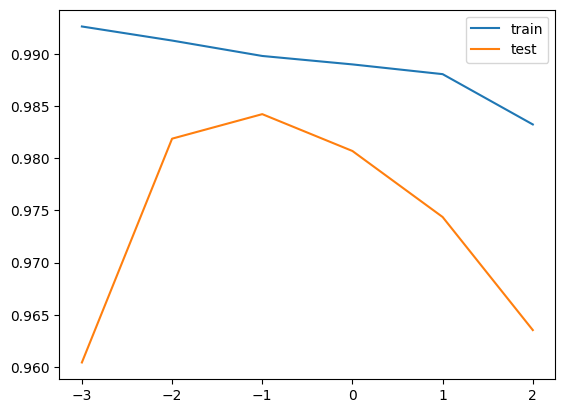

In [61]:
# alpha 값 찾기 - 시각화해 찾는다

import matplotlib.pyplot as plt

train_score = []
test_score = []
# 임의 alpha 범위 설정
alpha_list = [0.001,0.01,0.1,1,10,100]
# 반복하면서 그래프에 표시
for alpha in alpha_list:
    # 모델 적용
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
# 그래프 그리기 
# alpha_list 값을 x축 값으로 사용하기 위해 동일한 간격으로표시하기 위해
# 지수로 변환해 표시
# 0.001은 지수로 -3 / 0은 1, 100은 2
plt.plot(np.log10(alpha_list),train_score,label="train")
plt.plot(np.log10(alpha_list),test_score,label="test")

plt.legend()
plt.show()

# 훈련데이터와 테스트 데이터가 가장 가까워지는 x축의 값을 alpha값으로 설정
# -1 : 0.1

In [62]:
# 라쏘 모델 사용
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9891841592343474
0.9816966371762467


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

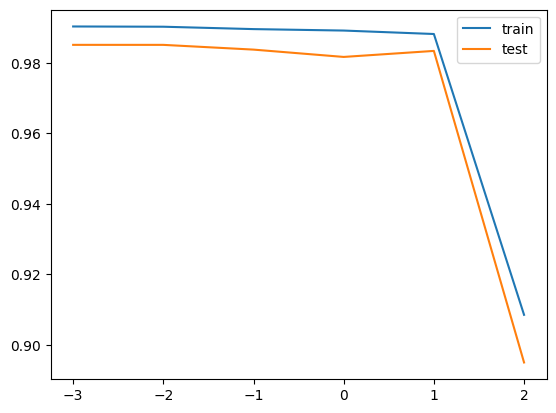

In [63]:
# 라쏘 모델도 alpha값의 범위를 이용해 최적의 alpha 값 결정

# alpha 값 찾기 - 시각화해 찾는다

import matplotlib.pyplot as plt

train_score = []
test_score = []
# 임의 alpha 범위 설정
alpha_list = [0.001,0.01,0.1,1,10,100]
# 반복하면서 그래프에 표시
for alpha in alpha_list:
    # 모델 적용
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled,train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))
    
# 그래프 그리기 
# alpha_list 값을 x축 값으로 사용하기 위해 동일한 간격으로표시하기 위해
# 지수로 변환해 표시
# 0.001은 지수로 -3 / 0은 1, 100은 2
plt.plot(np.log10(alpha_list),train_score,label="train")
plt.plot(np.log10(alpha_list),test_score,label="test")

plt.legend()
plt.show()

In [66]:
# 무게 예측
# lr, ridge, lasso 각각 모델로 예측해보기





print(lr.predict(test_poly))
print(ridge.predict(test_scaled))
print(lasso.predict(test_scaled))

[-1396.03767357    29.88265909   156.8742659     96.92063068
   117.48714386   734.17485982   765.39718434   -35.67430594
  5494.51344919    85.12648606  3868.93003631  -140.75162348
   -71.81533608  1168.72554942   304.52791284   178.03514536
   124.89361325]
[  47.56619102  120.13435312  247.6704252   155.91708759  155.89576329
  747.8556129   287.55979615  199.50448194  828.05076909  147.01193929
 1188.01020338   95.2391621   251.19273911  300.58626241  120.06478363
  151.21392076  118.76043868]
[134.97493514 187.22098335 297.55033183 221.84915784 218.09798988
 679.34608042 329.77451354 257.0811631  712.07342603 209.88599692
 937.75396748 167.2960557  307.45764719 344.7617116  187.51474835
 214.93019714 186.71220191]
